In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('HR_comma_sep.csv')

In [3]:
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
dataset.shape

(14999, 10)

In [5]:
dataset.isnull().sum(axis=0)

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
dataset['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [8]:
dataset['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<AxesSubplot:>

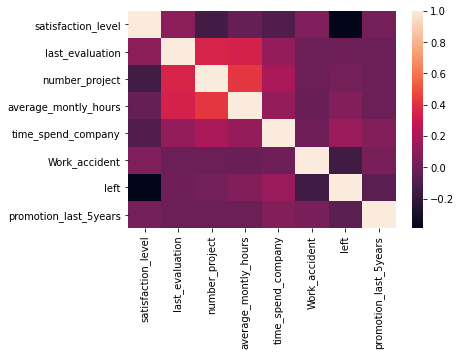

In [9]:
import seaborn as sns
sns.heatmap(dataset.corr())

In [10]:
x = dataset.drop(columns=['left'])
y = dataset['left']

In [11]:
# OneHotEncoder on sales
x = pd.get_dummies(x,'sales',drop_first=True)

In [12]:
x.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'sales_low',
       'sales_medium'],
      dtype='object')

In [13]:
#ordinal on salary
from sklearn.preprocessing import OrdinalEncoder
o_e = OrdinalEncoder()
x = o_e.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt_c = DecisionTreeClassifier()
dt_c.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
pred_test = dt_c.predict(X_test)


In [19]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, pred_test)

In [20]:
test_accuracy

0.9773333333333334